# A New (Structural) Classification of the World

In [1]:
import pandas as pd
import os
os.chdir('/Users/Carla/Documents/Network Analysis/sector-cluster/UN Value Added')

In [2]:
df=pd.read_csv('UNdata_20161114_185102414.csv')
df.head(10)

,Country or Area,Year,Item,Value
0,Afghanistan,2014,"Agriculture, hunting, forestry, fishing (ISIC ...",1.586140e+11
1,Afghanistan,2014,"Mining, Manufacturing, Utilities (ISIC C-E)",7.304891e+10
2,Afghanistan,2014,Manufacturing (ISIC D),6.745114e+10
3,Afghanistan,2014,Construction (ISIC F),7.760440e+10
4,Afghanistan,2014,"Wholesale, retail trade, restaurants and hotel...",5.386660e+10
5,Afghanistan,2014,"Transport, storage and communication (ISIC I)",1.598200e+11
6,Afghanistan,2014,Other Activities (ISIC J-P),1.142710e+11
7,Afghanistan,2014,Total Value Added,6.388730e+11
8,Afghanistan,2013,"Agriculture, hunting, forestry, fishing (ISIC ...",1.528940e+11
9,Afghanistan,2013,"Mining, Manufacturing, Utilities (ISIC C-E)",7.488088e+10


In [3]:
df.Year.value_counts()
df.shape

(70788, 4)

# To do list:
1. Do basic data cleanup.
2. Convert dataframe from long to wide.
2. Express each feature as a percentage of GDP.
3. Multidimensional scaling (PCA)
4. Clustering

In [4]:
#Let's look at which countries are incorrectly spelled
df['Country or Area'].unique()

df['Country or Area'].replace("C\xc3\xb4te d'Ivoire", "Cote d'Ivoire", inplace=True)
df['Country or Area'].replace('Cura\xc3\xa7ao', 'Curacao', inplace=True)
df['Country or Area'].unique().shape

(212,)

In [5]:
#First step: Unstacking the dataframe.

df=df.pivot_table(values='Value', columns='Item', index=['Year','Country or Area'],)
df.columns.name=None
df.reset_index()

,Year,Country or Area,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)"
0,1970,Afghanistan,2.338500e+11,2.020515e+09,3.095664e+10,3.165778e+10,1.363005e+10,3.067670e+11,8.560866e+09,1.355157e+10
1,1970,Albania,5.607245e+10,1.784069e+10,2.508796e+10,1.537260e+11,5.527613e+10,3.193120e+11,1.246513e+10,4.859521e+10
2,1970,Algeria,1.544870e+11,1.152390e+11,9.902226e+10,1.487530e+12,2.235540e+11,2.296790e+12,1.016440e+11,1.767800e+11
3,1970,Andorra,3.220440e+06,8.058628e+07,2.565793e+07,3.708882e+07,2.071472e+08,6.161976e+08,2.071878e+07,2.674360e+08
4,1970,Angola,1.436640e+11,7.046967e+10,1.341600e+11,4.799580e+11,4.954220e+11,1.487430e+12,6.640092e+10,2.219120e+11
5,1970,Anguilla,5.289414e+06,9.418003e+06,1.794740e+06,4.353777e+06,2.671986e+07,8.628000e+07,6.721922e+06,3.371200e+07
6,1970,Antigua and Barbuda,3.323525e+07,3.815231e+07,2.370113e+07,3.285552e+07,2.304175e+08,5.510766e+08,5.726303e+07,1.582321e+08
7,1970,Argentina,2.269570e+10,2.188846e+10,7.678967e+10,9.308029e+10,8.593305e+10,2.913670e+11,1.436264e+10,5.371611e+10
8,1970,Aruba,1.853099e+06,2.395240e+07,7.352538e+06,3.207059e+07,1.668152e+08,3.513198e+08,3.205015e+07,9.457833e+07
9,1970,Australia,1.084031e+10,2.281367e+10,5.619730e+10,7.572542e+10,1.137230e+11,2.782440e+11,1.542260e+10,4.183384e+10


In [6]:
#Step 2. Compute for shares
    
for column in df.columns:
    new_column_name = 'Share_{}'.format(column)
    df[new_column_name] = df[column].div(df['Total Value Added'])
    
    
df.reset_index()

,Year,Country or Area,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)","Share_Agriculture, hunting, forestry, fishing (ISIC A-B)",Share_Construction (ISIC F),Share_Manufacturing (ISIC D),"Share_Mining, Manufacturing, Utilities (ISIC C-E)",Share_Other Activities (ISIC J-P),Share_Total Value Added,"Share_Transport, storage and communication (ISIC I)","Share_Wholesale, retail trade, restaurants and hotels (ISIC G-H)"
0,1970,Afghanistan,2.338500e+11,2.020515e+09,3.095664e+10,3.165778e+10,1.363005e+10,3.067670e+11,8.560866e+09,1.355157e+10,0.762305,0.006586,0.100913,0.103198,0.044431,1.0,0.027907,0.044175
1,1970,Albania,5.607245e+10,1.784069e+10,2.508796e+10,1.537260e+11,5.527613e+10,3.193120e+11,1.246513e+10,4.859521e+10,0.175604,0.055872,0.078569,0.481429,0.173110,1.0,0.039037,0.152187
2,1970,Algeria,1.544870e+11,1.152390e+11,9.902226e+10,1.487530e+12,2.235540e+11,2.296790e+12,1.016440e+11,1.767800e+11,0.067262,0.050174,0.043113,0.647656,0.097333,1.0,0.044255,0.076968
3,1970,Andorra,3.220440e+06,8.058628e+07,2.565793e+07,3.708882e+07,2.071472e+08,6.161976e+08,2.071878e+07,2.674360e+08,0.005226,0.130780,0.041639,0.060190,0.336170,1.0,0.033624,0.434010
4,1970,Angola,1.436640e+11,7.046967e+10,1.341600e+11,4.799580e+11,4.954220e+11,1.487430e+12,6.640092e+10,2.219120e+11,0.096585,0.047377,0.090196,0.322676,0.333072,1.0,0.044641,0.149192
5,1970,Anguilla,5.289414e+06,9.418003e+06,1.794740e+06,4.353777e+06,2.671986e+07,8.628000e+07,6.721922e+06,3.371200e+07,0.061305,0.109156,0.020801,0.050461,0.309688,1.0,0.077908,0.390728
6,1970,Antigua and Barbuda,3.323525e+07,3.815231e+07,2.370113e+07,3.285552e+07,2.304175e+08,5.510766e+08,5.726303e+07,1.582321e+08,0.060310,0.069232,0.043009,0.059621,0.418122,1.0,0.103911,0.287133
7,1970,Argentina,2.269570e+10,2.188846e+10,7.678967e+10,9.308029e+10,8.593305e+10,2.913670e+11,1.436264e+10,5.371611e+10,0.077894,0.075123,0.263550,0.319461,0.294931,1.0,0.049294,0.184359
8,1970,Aruba,1.853099e+06,2.395240e+07,7.352538e+06,3.207059e+07,1.668152e+08,3.513198e+08,3.205015e+07,9.457833e+07,0.005275,0.068178,0.020928,0.091286,0.474824,1.0,0.091228,0.269209
9,1970,Australia,1.084031e+10,2.281367e+10,5.619730e+10,7.572542e+10,1.137230e+11,2.782440e+11,1.542260e+10,4.183384e+10,0.038960,0.081992,0.201971,0.272155,0.408717,1.0,0.055428,0.150349


In [7]:
df.shape

(8879, 16)

In [8]:
#just to make sure that we take the first 16 columns only. the code above might loop endlessly...

#create smaller dataframe of the data
share = df.ix[:,0:16]
share = df.reset_index()
share.drop(['Share_Total Value Added',
            'Agriculture, hunting, forestry, fishing (ISIC A-B)', 
            'Construction (ISIC F)','Manufacturing (ISIC D)',
            'Mining, Manufacturing, Utilities (ISIC C-E)',
            'Other Activities (ISIC J-P)','Total Value Added', 
            'Transport, storage and communication (ISIC I)', 
            'Wholesale, retail trade, restaurants and hotels (ISIC G-H)' ], axis=1, inplace=True)

In [9]:
share.Year=share.Year.astype(str)
share['sum']=share.sum(axis=1)
#just an arbitrary computation, it is not expected that all rows will sum to one -- there is overlap between groups

In [24]:
#WARNING: Takes three minutes to run
#Prepare for motivating visualizations

os.chdir('/Users/Carla/Documents/Network Analysis/sector-cluster/UN Value Added/CountryCharts')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

areaplots = share.ix[:,0:9]
plt.figure()

areaplots.set_index(['Year'], inplace=True)

# iterate through the list of countries, and create a plot
for country in areaplots['Country or Area'].unique():
    # plot.bar makes bar charts
    ax = areaplots[areaplots['Country or Area']==country].plot.bar(edgecolor=None, width=1.0, stacked=True)
    ax.legend_.remove()
    # add the country name to the top of the chart.
    ax.set_title(country)
    plt.savefig(country+'.png')
    plt.close('all')

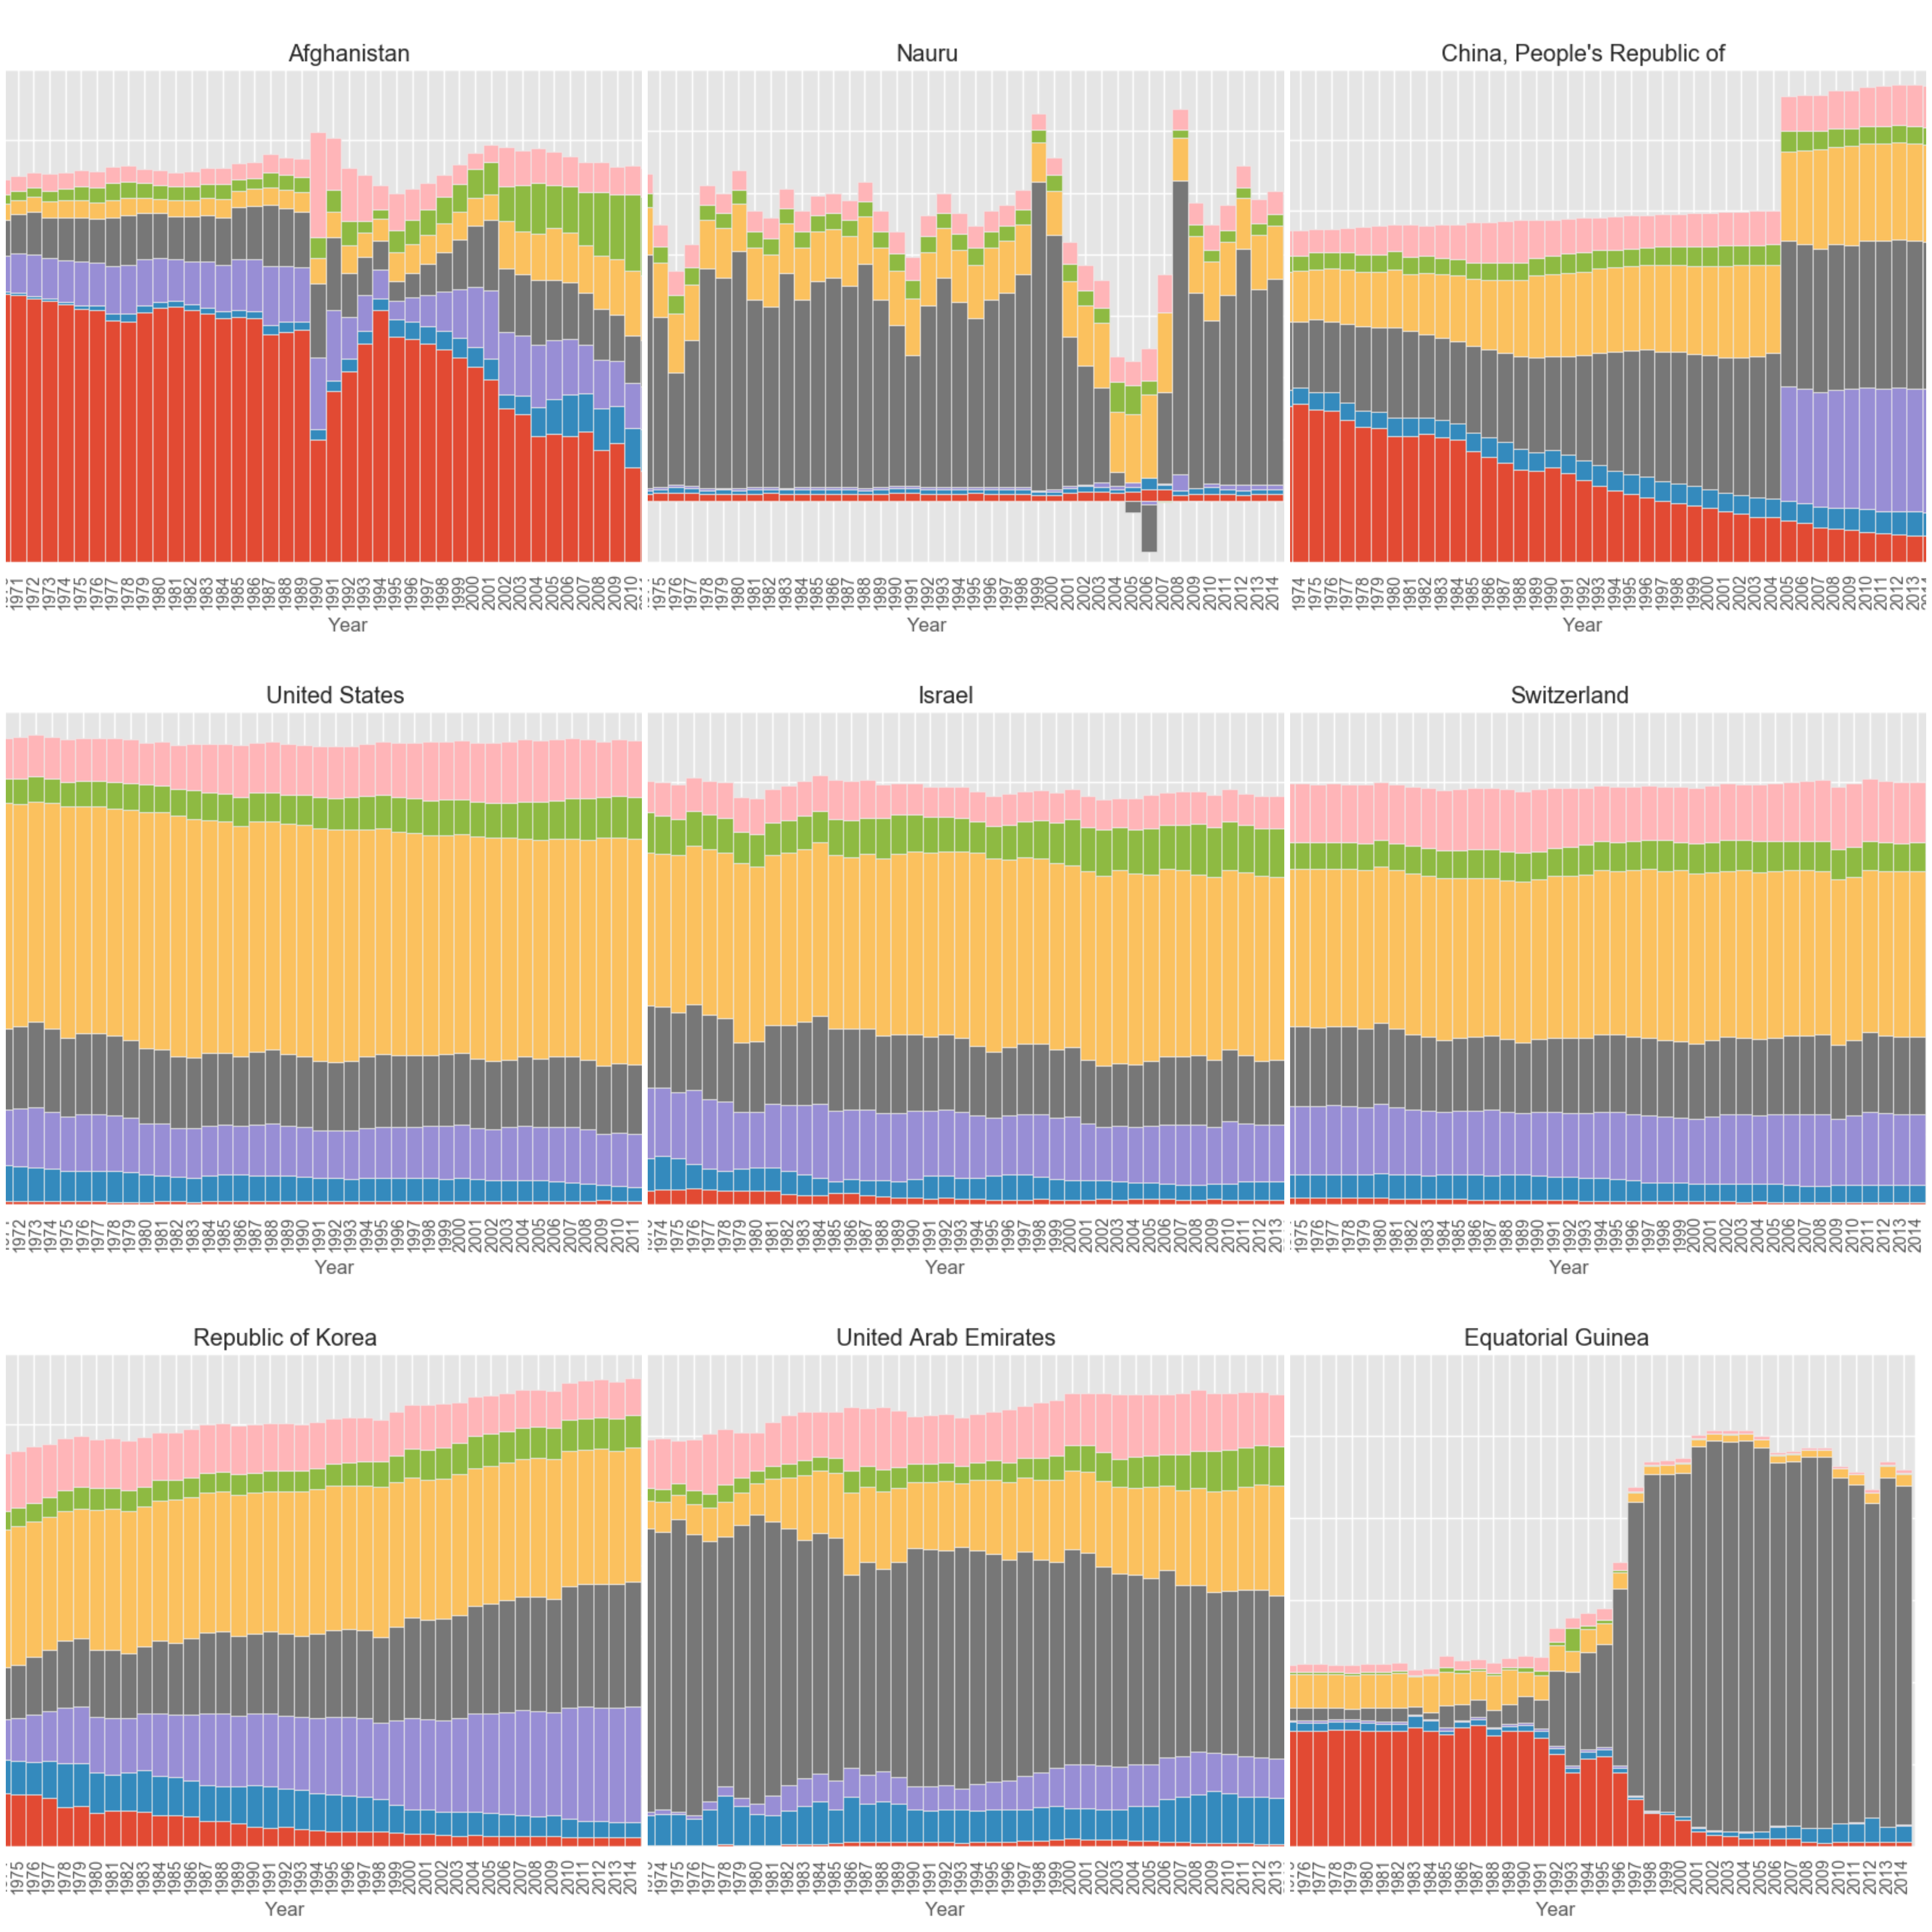

In [26]:
from IPython.display import Image
Image("SelectedCountries.png")

#First row: Volatile: Countries affected by an event at one point in time
#Second row: Stable: Countries that have been relatively stable in their economic structure
#Third row: Diversified: Countries which seemed to have some structural reform

#You can also see some data quality issues

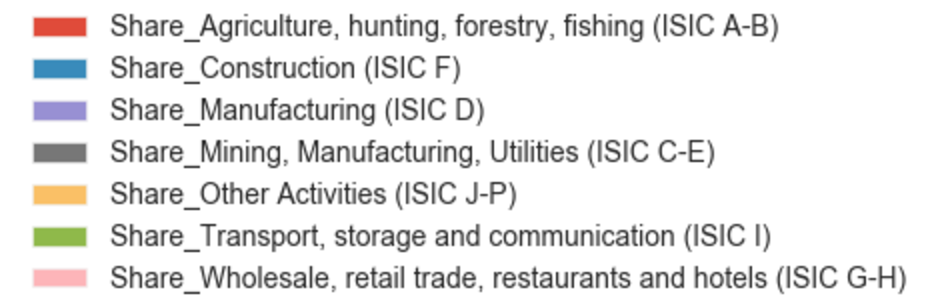

In [53]:
Image("Legend.png", width=400)

# Part 2: Multidimensional Scaling / PCA

In [75]:
#Data normalization

share = share.ix[:,0:10].fillna(value=0) #Retrieve the dataset that we will use for PCA and make sure there are no NaNs!
share.head()

,Year,Country or Area,"Share_Agriculture, hunting, forestry, fishing (ISIC A-B)",Share_Construction (ISIC F),Share_Manufacturing (ISIC D),"Share_Mining, Manufacturing, Utilities (ISIC C-E)",Share_Other Activities (ISIC J-P),"Share_Transport, storage and communication (ISIC I)","Share_Wholesale, retail trade, restaurants and hotels (ISIC G-H)"
0,1970,Afghanistan,0.762305,0.006586,0.100913,0.103198,0.044431,0.027907,0.044175
1,1970,Albania,0.175604,0.055872,0.078569,0.481429,0.173110,0.039037,0.152187
2,1970,Algeria,0.067262,0.050174,0.043113,0.647656,0.097333,0.044255,0.076968
3,1970,Andorra,0.005226,0.130780,0.041639,0.060190,0.336170,0.033624,0.434010
4,1970,Angola,0.096585,0.047377,0.090196,0.322676,0.333072,0.044641,0.149192


In [117]:
#Let's preserve the dataframe

shares_in_2014=share[share.Year== '2014'] #remember, the year is already a string var
shares_in_1990=share[share.Year== '2000']

In [118]:
X = shares_in_1990.ix[:,2:10].values #remember to only get the features

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

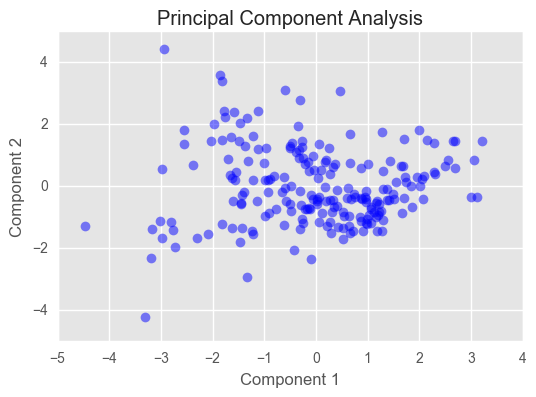

In [119]:
#First model: All countries at certain periods in time -- take period averages

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
%matplotlib inline
plt.plot(Y_sklearn[:,0],Y_sklearn[:,1], 'o', markersize=7, color='blue', alpha=0.5,)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Principal Component Analysis')
#WHAT A BIG BLOB OF NOTHING! :-(

# restrict to 2014 only


In [59]:
Y_sklearn

array([[-4.03269085,  3.08117087],
       [-1.63811161, -0.16367018],
       [-2.37820591, -1.03244774],
       ..., 
       [ 0.02663299,  0.62190105],
       [ 1.46805406,  0.49552627],
       [-0.45345551, -0.20772655]])

# Part 3: Clustering

Sources:

1) To unstack the DF: http://stackoverflow.com/questions/17333644/pandas-dataframe-transforming-frame-using-unique-values-of-a-column
